#### no Jupyter on local machine? You can try running this notebook in the cloud - just click one of the links below:
https://colab.research.google.com/github/slayoo/tmp/blob/main/Köhler.ipynb    
https://mybinder.org/v2/gh/slayoo/tmp.git/main?urlpath=lab/tree/Köhler.ipynb

#### -1: install (or ensure we have) the needed Python packages

In [1]:
!pip --quiet install pint scipy numpy matplotlib

#### 0: import and setup some useful Python packages

In [2]:
import numpy as np            # https://numpy.org/doc/stable/user/basics.html
from scipy import constants   # https://docs.scipy.org/doc/scipy/reference/constants.html

from matplotlib import pyplot # https://matplotlib.org/stable/api/pyplot_summary.html
#%matplotlib notebook         # https://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-matplotlib

import pint                   # https://pint.readthedocs.io/
si = pint.UnitRegistry()      # https://pint.readthedocs.io/en/stable/tutorial.html
si.setup_matplotlib()         # https://pint.readthedocs.io/en/stable/plotting.html

#### 1: develop a python script that calculates the saturation vapor pressure over a curved surface as a function of droplet radius for a given temperature
#### 2: If the water droplet has radius 50 nm and the ambient vapor pressure is 1750 Pa, will this droplet grow or evaporate?

In [3]:
sigma = 7.2e-2 * si.N / si.m
m_v = 18 * si.g / si.mole
rho_l = 1000 * si.kg / si.m**3
T_0 = 288 * si.K
R_star = constants.R * si.joule / si.kelvin / si.mole
radii = np.logspace(-8, -5) * si.m

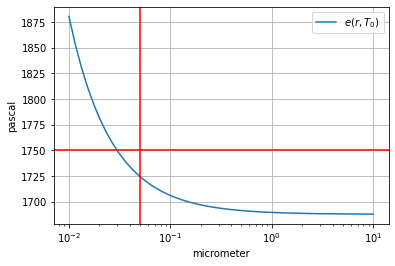

In [4]:
TC = T_0 - 273.15 * si.K
es_T = 611.2 * si.Pa * np.exp(17.67 * TC / (TC + 243.5 * si.K))
e_r_T = es_T * np.exp(2 * sigma * m_v / R_star / rho_l / radii / T_0)

pyplot.plot(radii, e_r_T, label='$e(r, T_0)$')
pyplot.xscale('log')
pyplot.grid()
pyplot.legend()
pyplot.gca().xaxis.set_units(si.um)
pyplot.axvline(50 * si.nm, color='red')
pyplot.axhline(1750 * si.Pa, color='red')
pyplot.show()

#### 3: let’s make our code a bit nicer ... 

In [5]:
def sat_vap_flat(T):
    TC = T - 273.15 * si.K
    return 611.2 * si.Pa * np.exp(17.67 * TC / (TC + 243.5 * si.K))

In [6]:
print(sat_vap_flat(273.15 * si.K))

611.2 pascal


#### 4: graph that shows S for a water droplet on the ordinate, and explore how temperature changes S

In [7]:
def S(T, r):
    return np.exp(2 * sigma * m_v / R_star / rho_l / r / T)

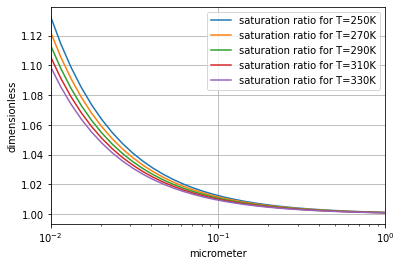

In [8]:
for T in range(250, 350, 20):
    pyplot.plot(radii, S(T * si.K, radii), label=f'saturation ratio for T={T}K')
pyplot.gca().xaxis.set_units(si.um)
pyplot.xscale('log')
pyplot.xlim(10 * si.nm, 1 * si.um)
pyplot.legend()
pyplot.grid()

#### 5:  several Koehler curves for a range of different dry aerosol masses in one graph.

In [9]:
def water_activity(radius, dry_mass, nu, m_s):
    water_mass = 4/3 * np.pi * radius**3 * rho_l
    n_s = dry_mass / m_s
    n_w = water_mass / m_v
    return np.exp(-nu * n_s / n_w)

def koehler_plot(m_s, T, nu):
    dry_masses = 10.**np.arange(-12, -17, -1, dtype=float) * si.g
    radii = np.logspace(-8, -4, 100) * si.m
    for dry_mass in dry_masses:
        pyplot.plot(radii, 
                    (water_activity(radii, dry_mass, nu, m_s) * S(T, radii) - 1) * 100, 
                    label=f'dry_mass={dry_mass}')
    pyplot.xscale('log')
    pyplot.ylabel('% supersaturation')
    pyplot.gca().xaxis.set_units(si.um)
    pyplot.ylim(-1.5, .5)
    pyplot.legend()
    pyplot.grid()

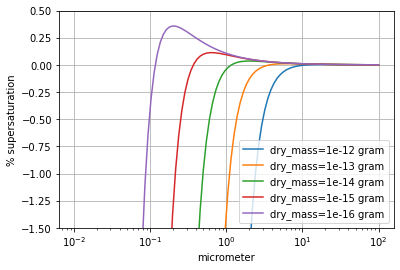

In [10]:
koehler_plot(m_s = 58.5 * si.g / si.mole, T = 288 * si.K, nu = 2)

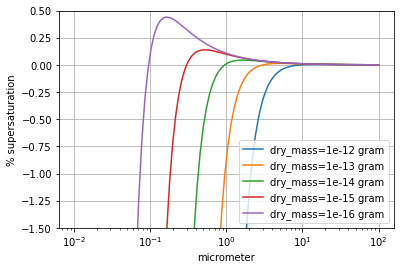

In [11]:
koehler_plot(m_s = 132.14 * si.g / si.mole, T = 288 * si.K, nu = 3)